The CORDIC (COordinate Rotation DIgital Computer) algorithm is a simple and efficient algorithm to calculate trigonometric functions, hyperbolic functions, square roots, multiplications, divisions, and exponentials, among others. It's particularly well-suited for hardware implementations or in environments where a floating point unit (FPU) is not available. However, it can also be used in software to generate sine waves, which are essential for creating DTMF (Dual-Tone Multi-Frequency) tones.

To generate DTMF tones using the CORDIC algorithm in Python, we first need a CORDIC-based sine wave generator. Then, we can use this generator to produce the two sine waves corresponding to each DTMF tone and sum them to get the final signal.

Below is an example Python implementation. This example focuses on the generation of a single DTMF tone using the CORDIC algorithm. Keep in mind that the CORDIC algorithm's accuracy depends on the number of iterations, and this implementation might not be as precise as using Python's built-in `math.sin()` function.

```python
import numpy as np
import matplotlib.pyplot as plt

def cordic_sine_cosine(theta, iterations=15):
    """
    Calculate sine and cosine using the CORDIC algorithm.
    """
    # CORDIC gain factor (for normalization)
    K = 0.6072529350088812561694
    # Initial vector (we start with the vector (K, 0))
    x = K
    y = 0
    # Initial angle
    z = theta
    
    # Constants for CORDIC rotations
    pow_2 = np.array([2.0 ** (-i) for i in range(iterations)])
    atan_pow_2 = np.arctan(pow_2)
    
    for i in range(iterations):
        if z < 0:
            x_new = x + y * pow_2[i]
            y = y - x * pow_2[i]
            x = x_new
            z = z + atan_pow_2[i]
        else:
            x_new = x - y * pow_2[i]
            y = y + x * pow_2[i]
            x = x_new
            z = z - atan_pow_2[i]
    
    return x, y  # x is cos(theta), y is sine(theta)

def generate_dtmf_tone(frequencies, duration, sample_rate):
    """
    Generate a DTMF tone using the CORDIC algorithm.
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.zeros_like(t)
    
    for freq in frequencies:
        for i, theta in enumerate(2 * np.pi * freq * t):
            _, sine = cordic_sine_cosine(theta)
            signal[i] += sine
    
    return signal / len(frequencies)  # Normalize the amplitude

# Example: Generate a DTMF tone for the digit "1" (697 Hz and 1209 Hz)
Fs = 8000  # Sample rate
digit_freqs = {'1': (697, 1209)}  # Define frequencies for other digits as needed
duration = 1  # seconds

tone = generate_dtmf_tone(digit_freqs['1'], duration, Fs)

# Plot the generated tone
plt.plot(tone[:400])  # Plot the first 50 ms
plt.title('DTMF Tone for Digit 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# To actually hear the tone, you would need to convert it to a WAV file or use a real-time audio library to play it.
```

This script defines a basic CORDIC algorithm to compute sine and cosine values, which are then used to generate the sine waves for the specified DTMF frequencies. The generated DTMF tone is a combination of two sine waves corresponding to the digit's frequencies. The example generates and plots the DTMF tone for the digit "1".

**Note**: This implementation is for educational purposes and might not be the most efficient for practical applications, especially when high precision or high performance is required. For real-world applications, using optimized libraries or direct trigonometric functions from a math library would be more appropriate.

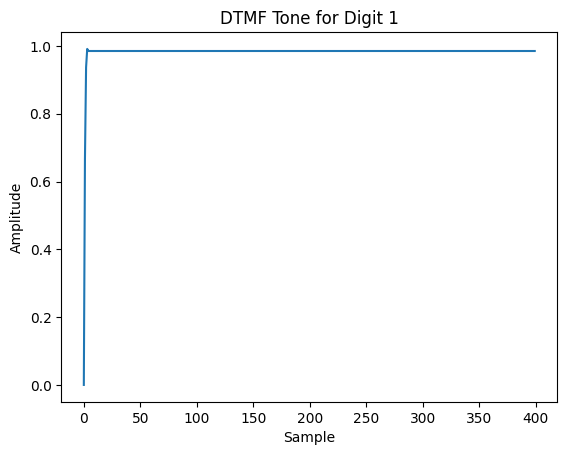

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cordic_sine_cosine(theta, iterations=15):
    """
    Calculate sine and cosine using the CORDIC algorithm.
    """
    # CORDIC gain factor (for normalization)
    K = 0.6072529350088812561694
    # Initial vector (we start with the vector (K, 0))
    x = K
    y = 0
    # Initial angle
    z = theta
    
    # Constants for CORDIC rotations
    pow_2 = np.array([2.0 ** (-i) for i in range(iterations)])
    atan_pow_2 = np.arctan(pow_2)
    
    for i in range(iterations):
        if z < 0:
            x_new = x + y * pow_2[i]
            y = y - x * pow_2[i]
            x = x_new
            z = z + atan_pow_2[i]
        else:
            x_new = x - y * pow_2[i]
            y = y + x * pow_2[i]
            x = x_new
            z = z - atan_pow_2[i]
    
    return x, y  # x is cos(theta), y is sine(theta)

def generate_dtmf_tone(frequencies, duration, sample_rate):
    """
    Generate a DTMF tone using the CORDIC algorithm.
    """
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.zeros_like(t)
    
    for freq in frequencies:
        for i, theta in enumerate(2 * np.pi * freq * t):
            _, sine = cordic_sine_cosine(theta)
            signal[i] += sine
    
    return signal / len(frequencies)  # Normalize the amplitude

# Example: Generate a DTMF tone for the digit "1" (697 Hz and 1209 Hz)
Fs = 8000  # Sample rate
digit_freqs = {'1': (697, 1209)}  # Define frequencies for other digits as needed
duration = 1  # seconds

tone = generate_dtmf_tone(digit_freqs['1'], duration, Fs)

# Plot the generated tone
plt.plot(tone[:400])  # Plot the first 50 ms
plt.title('DTMF Tone for Digit 1')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# To actually hear the tone, you would need to convert it to a WAV file or use a real-time audio library to play it.

Certainly! To detect DTMF (Dual-Tone Multi-Frequency) signals using the Goertzel algorithm in a Python script, you'll need to process the incoming audio stream in chunks (as you mentioned, 4 KB at a time) and apply the Goertzel algorithm to detect if any of the DTMF frequencies are present.

The Goertzel algorithm is efficient for detecting specific frequencies within a signal, making it ideal for identifying the DTMF tones used in telephone dialing.

Below is a simplified Python example that demonstrates how to apply the Goertzel algorithm to detect DTMF frequencies. This example assumes you have your audio data in a numpy array. For simplicity, the chunk size will be handled as the number of samples rather than bytes, and you should adjust the `chunk_size` based on your actual byte chunk size and sample format.

First, ensure you have numpy installed:
```bash
pip install numpy
```

Then, you can use the following script:

```python
import numpy as np

def goertzel(samples, sample_rate, target_freq):
    """
    Implement the Goertzel algorithm to detect a specific frequency within a signal.
    """
    s_prev = 0.0
    s_prev2 = 0.0
    normalized_frequency = target_freq / sample_rate
    coeff = 2 * np.cos(2 * np.pi * normalized_frequency)
    for sample in samples:
        s = sample + coeff * s_prev - s_prev2
        s_prev2 = s_prev
        s_prev = s
    power = s_prev2**2 + s_prev**2 - coeff * s_prev * s_prev2
    return power

def detect_dtmf_frequencies(samples, sample_rate):
    """
    Detects DTMF frequencies in a given sample chunk.
    """
    dtmf_frequencies = [697, 770, 852, 941, 1209, 1336, 1477]
    detected_frequencies = []
    for freq in dtmf_frequencies:
        power = goertzel(samples, sample_rate, freq)
        if power > threshold:  # Define a suitable threshold based on your application
            detected_frequencies.append(freq)
    return detected_frequencies

# Example usage
Fs = 44000  # Sample rate
chunk_size = 1024  # Number of samples in each chunk (modify based on your 4KB chunk size and sample format)

# Simulate reading a chunk of audio data (replace this with actual data reading)
samples = np.random.rand(chunk_size)  # Placeholder for actual audio data

# Detect DTMF frequencies in the chunk
detected_frequencies = detect_dtmf_frequencies(samples, Fs)
print("Detected frequencies:", detected_frequencies)
```

**Key Points to Note:**

- `goertzel` function: This function implements the Goertzel algorithm for a single frequency detection. It calculates the power of the target frequency component within the sample chunk.
- `detect_dtmf_frequencies` function: This function iterates over the list of DTMF frequencies, applying the Goertzel algorithm to each to detect their presence in the samples.
- `threshold`: You'll need to define a suitable threshold to decide whether a frequency is present or not. This threshold may require tuning based on the specifics of your audio signal and noise level.
- Audio Data: In this example, `samples` is a placeholder numpy array. In a real application, you would replace this with the actual audio data chunk you've read and converted to a numpy array.

Adjust the `chunk_size` based on your actual data. The chunk size in samples depends on the byte size of each sample (e.g., 16-bit, 24-bit) and the number of channels (mono or stereo). For a 4 KB chunk of 16-bit mono audio at a sample rate of 44.1 kHz, the chunk size in samples would be 2048 (`4096 bytes / 2 bytes per sample`).

In [4]:
import numpy as np

def goertzel(samples, sample_rate, target_freq):
    """
    Implement the Goertzel algorithm to detect a specific frequency within a signal.
    """
    
    s_prev = 0.0
    s_prev2 = 0.0
    normalized_frequency = target_freq / sample_rate
    coeff = 2 * np.cos(2 * np.pi * normalized_frequency)
    for sample in samples:
        s = sample + coeff * s_prev - s_prev2
        s_prev2 = s_prev
        s_prev = s
    power = s_prev2**2 + s_prev**2 - coeff * s_prev * s_prev2
    return power

def detect_dtmf_frequencies(samples, sample_rate, 
                            threshold:float = 0.8,
                            dtmf_frequencies = [697, 770, 852, 941, 1209, 1336, 1477, 1633]):
    """
    Detects DTMF frequencies in a given sample chunk.
    """
    detected_frequencies = []
    for freq in dtmf_frequencies:
        power = goertzel(samples, sample_rate, freq)
        if power > threshold:  # Define a suitable threshold based on your application
            detected_frequencies.append(freq)
    return detected_frequencies

def to_dtmf_frequencies(samples, sample_rate,
                        chunk_size:int=1024, 
                        threshold:float = 0.8,
                        dtmf_frequencies:list[int] = [697, 770, 852, 941, 1209, 1336, 1477, 1633],
                        carrier:int|None=None):
    """
    Detects DTMF frequencies in a given sample chunk.
    """
    if carrier:
        dtmf_frequencies.append(carrier)
    detected_frequencies = []
    for chunkIDX in list(range(0,len(samples),chunk_size)):
        detected_frequencies.append([goertzel(samples[chunkIDX:min(len(samples),chunkIDX+chunk_size)], 
                                              sample_rate, freq) for freq in dtmf_frequencies])
    return detected_frequencies

# Example usage
Fs = 44000  # Sample rate
chunk_size = 1024  # Number of samples in each chunk (modify based on your 4KB chunk size and sample format)

# Simulate reading a chunk of audio data (replace this with actual data reading)
samples = np.random.rand(chunk_size)  # Placeholder for actual audio data

# Detect DTMF frequencies in the chunk
detected_frequencies = detect_dtmf_frequencies(samples, Fs)
print("Detected frequencies:", detected_frequencies)

Detected frequencies: [697, 770, 852, 941, 1209, 1336, 1477, 1633]


In [9]:
chunk_size=12
list(range(0,121,chunk_size))

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]

Using the Goertzel algorithm "in reverse" for sinusoid synthesis is an interesting application. Typically, the Goertzel algorithm is known for its use in frequency analysis, particularly in detecting the presence of a single frequency within a signal. However, the core principle of the algorithm, based on a recursive filter, can indeed be adapted to generate sinusoidal signals efficiently.

The key insight for synthesis is that the Goertzel algorithm, at its heart, implements a second-order IIR (Infinite Impulse Response) filter. When used for frequency detection, it's tuned to resonate at a specific frequency. For synthesis, we can exploit this resonance to generate a continuous sinusoid at the desired frequency.

Here's how you can do it:

1. **Initialization**: Choose the target frequency (\(f\)) you want to synthesize, and determine the sampling rate (\(F_s\)) of your system.
2. **Coefficient Calculation**: Calculate the necessary coefficient (\(k\)) for the Goertzel algorithm based on the target frequency.
3. **Recursive Formula**: Use the Goertzel recursive formula to generate each sample of the sinusoid.

The recursive formula for the Goertzel algorithm is as follows:

\[ s[n] = 2\cos(2\pi\frac{f}{F_s})s[n-1] - s[n-2] \]

Where:
- \(s[n]\) is the current sample.
- \(s[n-1]\) and \(s[n-2]\) are the previous two samples.
- \(f\) is the target frequency.
- \(F_s\) is the sampling rate.

For synthesis, we need to initialize \(s[-1]\) and \(s[-2]\) appropriately to start the oscillation. A simple way to do this is to start with $$\(s[-2] = 0\) and \(s[-1] = \sin(2\pi\frac{f}{F_s})\)$$, which essentially starts the generator in the middle of an oscillation.

Here is a Python example that demonstrates this approach:

```python
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoid(freq, sample_rate, duration):
    # Coefficient for the Goertzel algorithm
    coeff = 2 * np.cos(2 * np.pi * freq / sample_rate)
    
    # Initialize the first two samples
    s_minus_2 = 0
    s_minus_1 = np.sin(2 * np.pi * freq / sample_rate)
    
    # Generate the sinusoid
    samples = np.zeros(int(sample_rate * duration))
    for n in range(len(samples)):
        s = coeff * s_minus_1 - s_minus_2
        samples[n] = s
        
        # Update previous samples
        s_minus_2 = s_minus_1
        s_minus_1 = s
    
    return samples

# Parameters
freq = 440  # Target frequency in Hz
sample_rate = 8000  # Sampling rate in Hz
duration = 1  # Duration in seconds

# Generate and plot the sinusoid
sinusoid = generate_sinusoid(freq, sample_rate, duration)
plt.plot(sinusoid[:100])  # Plot the first few samples
plt.title(f'Sinusoid of {freq} Hz')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
```

This script synthesizes a sinusoid at the specified frequency and plots the first few samples. The key here is the efficient use of the Goertzel algorithm's recursive nature to generate each sample with minimal computation, demonstrating an elegant "reverse" application of the algorithm traditionally used for frequency analysis.

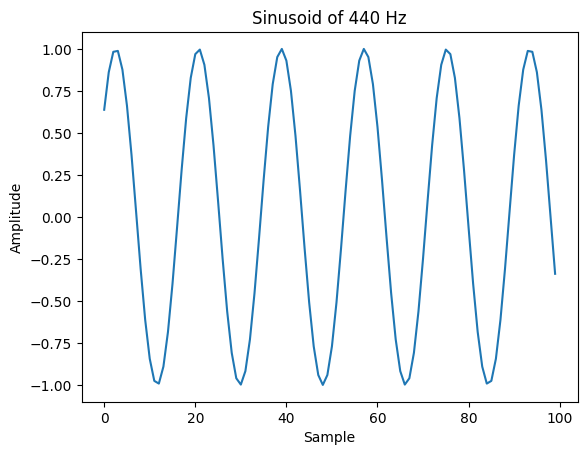

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoid(freq, sample_rate, duration):
    # Coefficient for the Goertzel algorithm
    coeff = 2 * np.cos(2 * np.pi * freq / sample_rate)
    
    # Initialize the first two samples
    s_minus_2 = 0
    s_minus_1 = np.sin(2 * np.pi * freq / sample_rate)
    
    # Generate the sinusoid
    samples = np.zeros(int(sample_rate * duration))
    for n in range(len(samples)):
        s = coeff * s_minus_1 - s_minus_2
        samples[n] = s
        
        # Update previous samples
        s_minus_2 = s_minus_1
        s_minus_1 = s
    
    return samples

# Parameters
freq = 440  # Target frequency in Hz
sample_rate = 8000  # Sampling rate in Hz
duration = 1  # Duration in seconds

# Generate and plot the sinusoid
sinusoid = generate_sinusoid(freq, sample_rate, duration)
plt.plot(sinusoid[:100])  # Plot the first few samples
plt.title(f'Sinusoid of {freq} Hz')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

Certainly! Below is a simple DTMF generator in Python that uses NumPy's trigonometric functions to synthesize DTMF tones based on an array of tuples. Each tuple contains a DTMF digit, the start time, and the end time for the tone. The generator handles overlapping DTMF entries by adding the tones together where they overlap in time.

First, ensure you have NumPy installed:
```bash
pip install numpy
```

Here's the DTMF generator:

```python
import numpy as np
import matplotlib.pyplot as plt

def generate_dtmf_tone(digit, fs, duration):
    """
    Generate a DTMF tone for the given digit.
    """
    # DTMF frequencies for each digit
    dtmf_freqs = {
        '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
        '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
        '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
        '*': (941, 1209), '0': (941, 1336), '#': (941, 1477),
        'A': (697, 1633), 'B': (770, 1633), 'C': (852, 1633), 'D': (941, 1633)
    }
    
    low_freq, high_freq = dtmf_freqs[digit]
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    tone = np.sin(2 * np.pi * low_freq * t) + np.sin(2 * np.pi * high_freq * t)
    return tone

def generate_dtmf_sequence(sequence, fs, total_duration):
    """
    Generate a sequence of DTMF tones based on an array of tuples (digit, start_time, end_time).
    Some DTMF entries may overlap in time.
    """
    output_signal = np.zeros(int(fs * total_duration))
    for digit, start_time, end_time in sequence:
        duration = end_time - start_time
        tone = generate_dtmf_tone(digit, fs, duration)
        start_sample = int(fs * start_time)
        end_sample = start_sample + len(tone)
        output_signal[start_sample:end_sample] += tone
    
    return output_signal

# Parameters
fs = 8000  # Sampling rate

# Example sequence: digit, start_time, end_time
sequence = [
    ('1', 0, 1),
    ('2', 0.5, 1.5),
    ('3', 1, 2),
    ('A', 1.5, 2.5)  # Overlapping tones
]

# Generate DTMF sequence
total_duration = 2.5  # Total duration of the sequence
dtmf_signal = generate_dtmf_sequence(sequence, fs, total_duration)

# Plot the generated signal
plt.figure(figsize=(10, 4))
plt.plot(dtmf_signal)
plt.title('Generated DTMF Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
```

This script defines two main functions:

- `generate_dtmf_tone(digit, fs, duration)`: Generates a DTMF tone for a specified digit over a given duration.
- `generate_dtmf_sequence(sequence, fs, total_duration)`: Generates a complete DTMF sequence based on an array of tuples. Each tuple contains a digit and its start and end times. The function supports overlapping tones by adding them together in the output signal.

The example sequence demonstrates overlapping tones. The script plots the generated DTMF signal, showing how different tones are synthesized and combined over time.

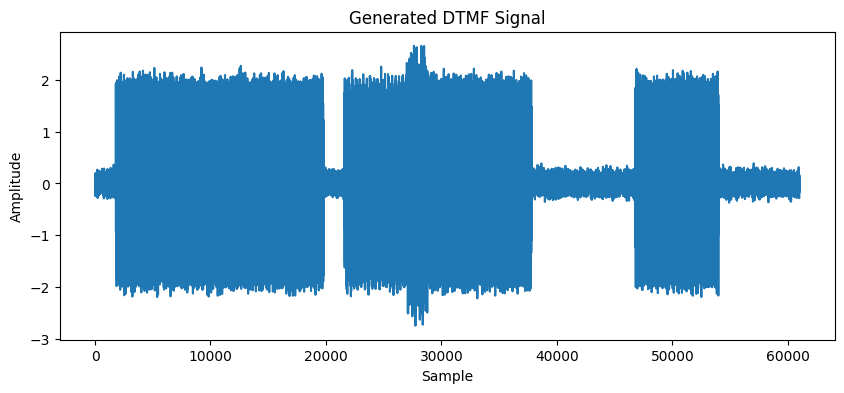

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dtmf_tone(digit:list[str], fs:float, duration:float):
    """
    Generate a DTMF tone for the given digit.
    """
    # DTMF frequencies for each digit
    dtmf_freqs = {
        '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
        '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
        '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
        '*': (941, 1209), '0': (941, 1336), '#': (941, 1477),
        'A': (697, 1633), 'B': (770, 1633), 'C': (852, 1633), 'D': (941, 1633)
    }
    
    low_freq, high_freq = dtmf_freqs[digit]
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    tone = np.sin(2 * np.pi * low_freq * t) + np.sin(2 * np.pi * high_freq * t)
    return tone

def generate_dtmf_sequence(sequence, fs, total_duration,pad:float=0.1):
    """
    Generate a sequence of DTMF tones based on an array of tuples (digit, start_time, end_time).
    Some DTMF entries may overlap in time.
    """
    output_signal = np.zeros(int(fs * total_duration))
    output_scaler = np.zeros(int(fs * total_duration))
    padlen=int(fs * pad)
    for digit, start_time, end_time in sequence:
        duration = end_time - start_time
        tone = generate_dtmf_tone(digit, fs, duration)
        start_sample = int(fs * start_time)
        end_sample = start_sample + len(tone)
        output_signal[start_sample:end_sample] += tone
        output_scaler[start_sample:end_sample] += 1
        
    return np.array([0.]*padlen + 
                    [output_signal[ii]/np.sqrt(max(1.,xx)) for ii,xx in enumerate(output_scaler)] +
                    [0.]*padlen)

# Parameters
Fs = 18000  # Sampling rate

# Example sequence: digit, start_time, end_time
sequence = [
    ('1', 0, 1),
    ('2', 1.1, 1.5),
    ('3', 1.4, 2),
    ('#', 2.5, 2.9)  # Overlapping tones
]

# Generate DTMF sequence
total_duration = 1.1*max([xx[2] for xx in sequence])  # Total duration of the sequence
dtmf_signal = generate_dtmf_sequence(sequence, Fs, total_duration)

noise=np.random.randn(int(len(dtmf_signal)))*0.1
dtmf_signal+=noise
# Plot the generated signal
plt.figure(figsize=(10, 4))
plt.plot(dtmf_signal)
plt.title('Generated DTMF Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [1]:
import IPython.display as ipd
import wave
import numpy as np
wav_filename = 'DTMF_dialing.wav'
with wave.open(wav_filename) as wav_file:
   metadata = wav_file.getparams()
   frames = wav_file.readframes(metadata.nframes)
print(f"Meta: {metadata}")
pcm_samples = np.frombuffer(frames, dtype="<h")
normalized_amplitudes = pcm_samples / (2 ** 15)
std_dev_ratio=0.2
normalized_amplitudes_w_noise=normalized_amplitudes+ np.random.normal(0, np.max(normalized_amplitudes) * std_dev_ratio, normalized_amplitudes.shape)

ipd.Audio(data=normalized_amplitudes_w_noise,rate=metadata.framerate) # load a local WAV file

Meta: _wave_params(nchannels=1, sampwidth=2, framerate=8000, nframes=100096, comptype='NONE', compname='not compressed')


In [21]:
import numpy as np

class DTMFDecoder:

    confusionSymbol='?'
    frameSymbol='|'
    noToneSymbol='.'

    def __init__(self, threshold=0.8, m=2, n=3,
                 low_freqs=[697, 770, 852, 941],
                 high_freqs = [1209, 1336, 1477, 1633],
                 frame_gap:int = 10,
                 symbols="123A456B789C*0#D"):
        # Class constants
        self.LOW_FREQS=low_freqs
        self.HIGH_FREQS=high_freqs
        self.DTMF_SYMBOLS={ (ll,hh):symbols[ii*(len(high_freqs)) + jj] 
                           for ii,ll in enumerate(low_freqs) 
                           for jj,hh in enumerate(high_freqs) }
        self.DTMF_MAPPING={ ss:ii-2 for ii,ss in enumerate(list(symbols)+[self.confusionSymbol,self.noToneSymbol])}
        self.threshold = threshold
        self.m = m
        self.n = n
        self.frame_gap = frame_gap
        self.state: list[np.array]=[]
        self.lastDecodeSymbols=[]
        self.lastDecodeNumShort=[]
        self.lastDecodeSymbolsShort=[]
        # self.state = {freq: [0] * n for freq in self.LOW_FREQS + self.HIGH_FREQS}

    def process_time_series(self, streams:list, retVal:int=0)->list:
        symbols = []
        self.lastDecodeSymbols = []
        self.lastDecodeNum = []
        self.lastDecodeSymbolsShort=[DTMFDecoder.noToneSymbol]
        nLows=len(self.LOW_FREQS)
        nHighs=len(self.HIGH_FREQS)
        allFreqs=self.LOW_FREQS+self.HIGH_FREQS
        scoresMofN = np.zeros(nLows+nHighs,dtype=np.int16)
        self.state = [np.zeros(nLows+nHighs,dtype=np.int16) for _ in range(self.n)]

        # Update state
        lastSymbolCnt=1
        for idx,row in enumerate(streams):
            #threshold each frequency stream
            self.state.append(np.array([1 if xx else 0 for xx in np.array(row) > self.threshold],dtype=np.int16))

            #Calc N sums
            scoresMofN+=self.state[-1]-self.state.pop(0)
            # print(f"      - MofN: {scoresMofN}")

            #do M of N assessment
            assessMofN=scoresMofN>=self.m

            active_low = []
            active_high = []
            for fIdx, freqOn in enumerate(assessMofN):
                if freqOn:
                    (active_low if fIdx<nLows else active_high).append(allFreqs[fIdx])
            allActiveCombos=[(ll,hh) for hh in active_high for ll in active_low]
            if len(allActiveCombos)>1:
                self.lastDecodeSymbols.append(self.confusionSymbol)
            elif len(allActiveCombos)<1:
                self.lastDecodeSymbols.append(self.noToneSymbol)
            elif allActiveCombos[0] in self.DTMF_SYMBOLS:
                self.lastDecodeSymbols.append(self.DTMF_SYMBOLS[allActiveCombos[0]])
            else:
                self.lastDecodeSymbols.append(self.confusionSymbol)
            char=self.lastDecodeSymbols[-1]
            
            # Do some parsing along the way to decode and summarize
            self.lastDecodeNum.append(self.DTMF_MAPPING[char])
            if self.lastDecodeSymbolsShort[-1]==DTMFDecoder.noToneSymbol:
                if char == DTMFDecoder.noToneSymbol:
                    lastSymbolCnt+=1
                    if lastSymbolCnt > self.frame_gap:
                        self.lastDecodeSymbolsShort.append(DTMFDecoder.frameSymbol)
                else:
                    lastSymbolCnt=1
                    self.lastDecodeSymbolsShort.append(char)
            elif self.lastDecodeSymbolsShort[-1]==DTMFDecoder.frameSymbol:
                if char != DTMFDecoder.noToneSymbol:
                    lastSymbolCnt=1
                    self.lastDecodeSymbolsShort.append(char)
            else:
                if char==self.lastDecodeSymbolsShort[-1]:
                    lastSymbolCnt+=1
                else:
                    lastSymbolCnt=1
                    self.lastDecodeSymbolsShort.append(char)
        if retVal==0:
            return self.lastDecodeSymbols
        elif retVal==1:
            return self.lastDecodeNum
        else:
            return self.lastDecodeSymbolsShort


................................00000..6666..99999..6666..66666.77777..5555..33333..5555..66666...............................44444.66666..4444..66666..4444..11111..5555..11111..8888..00000...............................2222..33333..3333..66666..7777..3333...1111..4444..11111..6666...............................33333..6666..00000..8888..33333..3333..88888..1111..66666..0000...............
.|0.6.9.6.6.7.5.3.5.6.|4.6.4.6.4.1.5.1.8.0.|2.3.3.6.7.3.1.4.1.6.|3.6.0.8.3.3.8.1.6.0.|


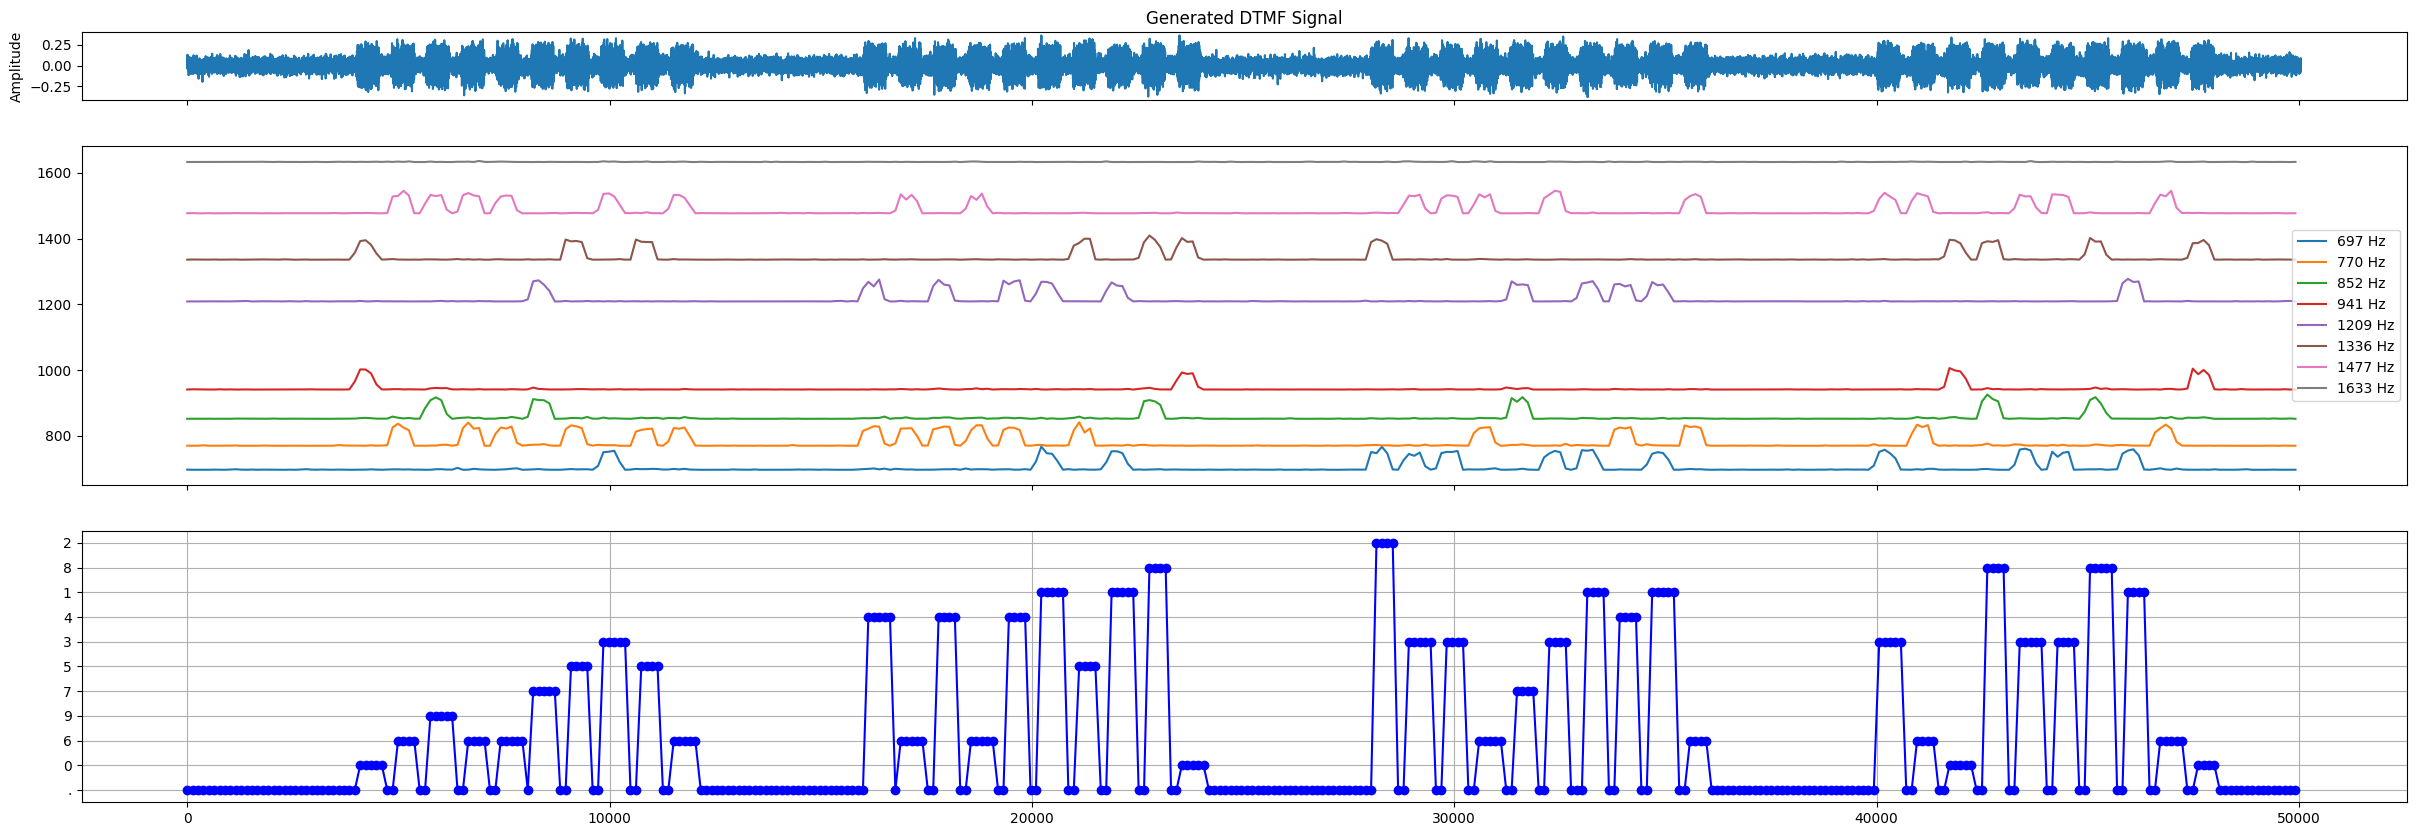

In [22]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

std_dev_ratio=0.2

normalized_amplitudes_w_noise=normalized_amplitudes + np.random.normal(0, np.max(normalized_amplitudes) * std_dev_ratio, normalized_amplitudes.shape)

normalized_amplitudes_w_noise=normalized_amplitudes_w_noise[:len(normalized_amplitudes_w_noise)//2]

#attenuate 
normalized_amplitudes_w_noise *= 0.3
decoder = DTMFDecoder(threshold=5)

#  usage
chunk_size = 128  # Number of samples in each chunk 
dtmf_frequencies = decoder.LOW_FREQS + decoder.HIGH_FREQS 
# Detect DTMF frequencies in the chunk
detected_frequencies = to_dtmf_frequencies(normalized_amplitudes_w_noise,
                                           metadata.framerate,chunk_size=chunk_size,
                                           dtmf_frequencies=dtmf_frequencies)

symbols= decoder.process_time_series(detected_frequencies)

symbolCodes = decoder.lastDecodeNum
symbolShort = decoder.lastDecodeSymbolsShort

print("".join(symbols))
print("".join(symbolShort))

x=list(range(0,len(normalized_amplitudes_w_noise),chunk_size))
fig,ax=plt.subplots(3,1,sharex=True,figsize=(30,10),height_ratios=[.1,0.5,0.4])
ax0:Axes=ax[0]
ax1:Axes=ax[1]
ax2:Axes=ax[2]
#plt.figure(figsize=(10, 10))
#for ff in dtmf_frequencies:
ax0.plot(normalized_amplitudes_w_noise)
ax0.set_title('Generated DTMF Signal')
#plt.xlabel('Sample')
ax0.set_ylabel('Amplitude')
ax1.plot(x,(np.array(detected_frequencies)) + dtmf_frequencies)
ax1.legend([f"{ff} Hz" for ff in dtmf_frequencies])
ax2.plot(x,symbols,'bo-')
ax2.grid(True)



In [78]:
decoder.threshold

300

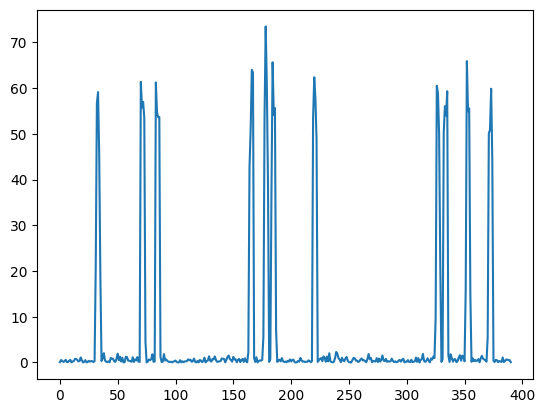

In [23]:
plt.plot(np.array(detected_frequencies)[:,5])

In [53]:
import numpy as np

class DTMFDecoder:
    # Class constants
    # LOW_FREQS = [697, 770, 852, 941]
    # HIGH_FREQS = [1209, 1336, 1477, 1633]
    # DTMF_SYMBOLS = {
    #     (697, 1209): '1', (697, 1336): '2', (697, 1477): '3', (697, 1633): 'A',
    #     (770, 1209): '4', (770, 1336): '5', (770, 1477): '6', (770, 1633): 'B',
    #     (852, 1209): '7', (852, 1336): '8', (852, 1477): '9', (852, 1633): 'C',
    #     (941, 1209): '*', (941, 1336): '0', (941, 1477): '#', (941, 1633): 'D'
    # }

    def __init__(self, threshold=0.8, m=5, n=10,
                 low_freqs=[697, 770, 852, 941],
                 high_freqs = [1209, 1336, 1477, 1633],
                 symbols="123A456B789C*0#D"):
        # Class constants
        self.LOW_FREQS=low_freqs
        self.HIGH_FREQS=high_freqs
        self.DTMF_SYMBOLS={ (ll,hh):symbols[ii*(len(high_freqs)) + jj] 
                           for ii,ll in enumerate(low_freqs) 
                           for jj,hh in enumerate(high_freqs) }
        self.threshold = threshold
        self.m = m
        self.n = n
        self.state = {freq: [0] * n for freq in self.LOW_FREQS + self.HIGH_FREQS}

    def process_time_series(self, streams):
        symbols = []
        for i in range(len(streams[0])):
            active_low = []
            active_high = []
            
            # Update state
            for idx, freq in enumerate(self.LOW_FREQS + self.HIGH_FREQS):
                self.state[freq].append(1 if streams[idx][i] > self.threshold else 0)
                self.state[freq] = self.state[freq][-self.n:]
            
            # Determine active frequencies
            for freq in self.LOW_FREQS:
                if sum(self.state[freq]) >= self.m:
                    active_low.append(freq)
            for freq in self.HIGH_FREQS:
                if sum(self.state[freq]) >= self.m:
                    active_high.append(freq)
            
            # Determine DTMF symbol
            for low in active_low:
                for high in active_high:
                    if (low, high) in self.DTMF_SYMBOLS:
                        symbols.append(self.DTMF_SYMBOLS[(low, high)])
                        break
        
        return symbols

# Example usage with dummy data
streams = [np.random.rand(100) for _ in range(8)]  # Replace with actual time series data
decoder = DTMFDecoder()
symbols = decoder.process_time_series(streams)
print(symbols)


[]


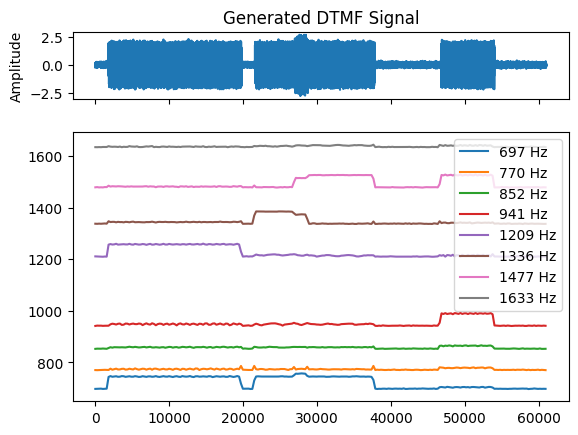

In [45]:
from matplotlib.axes import Axes
# Example usage
chunk_size = 256  # Number of samples in each chunk (modify based on your 4KB chunk size and sample format)
dtmf_frequencies = [697, 770, 852, 941, 1209, 1336, 1477, 1633]
# Detect DTMF frequencies in the chunk
detected_frequencies = to_dtmf_frequencies(dtmf_signal, Fs,chunk_size=chunk_size)
#print("Detected frequencies:", detected_frequencies)
x=list(range(0,len(dtmf_signal),chunk_size))
fig,ax=plt.subplots(2,1,sharex=True,height_ratios=[.2,0.8])
ax0:Axes=ax[0]
ax1:Axes=ax[1]
#plt.figure(figsize=(10, 10))
#for ff in dtmf_frequencies:
ax0.plot(dtmf_signal)
ax0.set_title('Generated DTMF Signal')
#plt.xlabel('Sample')
ax0.set_ylabel('Amplitude')
ax1.plot(x,np.array(detected_frequencies)**0.4 + dtmf_frequencies)
ax1.legend([f"{ff} Hz" for ff in dtmf_frequencies])


In [42]:
digits=['1','4']
duration=0.01
fs=8000
dtmf_freqs = {
        '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
        '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
        '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
        '*': (941, 1209), '0': (941, 1336), '#': (941, 1477),
        'A': (697, 1633), 'B': (770, 1633), 'C': (852, 1633), 'D': (941, 1633)
    }
    
ff=np.array(list(set([freq for digit in digits for freq in dtmf_freqs[digit]  ])))
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
tone = np.sum([np.sin(2 * np.pi * f * t) for f in ff] ,0)/len(ff)
tone


array([ 0.        ,  0.63406718,  0.92363143,  0.75224488,  0.2884703 ,
       -0.16276576, -0.38778045, -0.38951804, -0.3233921 , -0.31732767,
       -0.34254738, -0.24999495,  0.06254344,  0.50656217,  0.82166025,
        0.75910873,  0.28729902, -0.35258761, -0.79744866, -0.8104978 ,
       -0.43732638,  0.0475777 ,  0.35506153,  0.38317345,  0.25165375,
        0.15696398,  0.18322238,  0.23418663,  0.14113827, -0.15355977,
       -0.50510666, -0.65736931, -0.44913491,  0.03572854,  0.50616972,
        0.66971821,  0.44655179,  0.02215499, -0.30224619, -0.33988835,
       -0.14530586,  0.05803058,  0.08037715, -0.07468247, -0.22570193,
       -0.18521613,  0.06335783,  0.33835465,  0.40841435,  0.19220748,
       -0.16155989, -0.38615492, -0.31184736, -0.00634445,  0.27769155,
        0.30741474,  0.05956654, -0.26071036, -0.38749982, -0.21034278,
        0.13794989,  0.3919166 ,  0.36870334,  0.10966182, -0.16584772,
       -0.25058314, -0.12046706,  0.0573992 ,  0.08346387, -0.08

In [46]:
import wave
import numpy as np

def read_wav_file(filename):
    with wave.open(filename, 'rb') as wav_file:
        samplerate = wav_file.getframerate()
        frames = wav_file.getnframes()
        channels = wav_file.getnchannels()
        width = wav_file.getsampwidth()
        
        data = wav_file.readframes(frames)
        data = np.frombuffer(data, dtype=np.int16)  # This might change based on the sample width
        
        # If the WAV file is stereo, reshape it accordingly
        if channels > 1:
            data = np.reshape(data, (frames, channels))
            
    return data, samplerate

# Example usage
wav_filename = 'DTMF_dialing.wav'
wav_data, wav_samplerate = read_wav_file(wav_filename)
print(f"WAV Sample Rate: {wav_samplerate}")

WAV Sample Rate: 8000


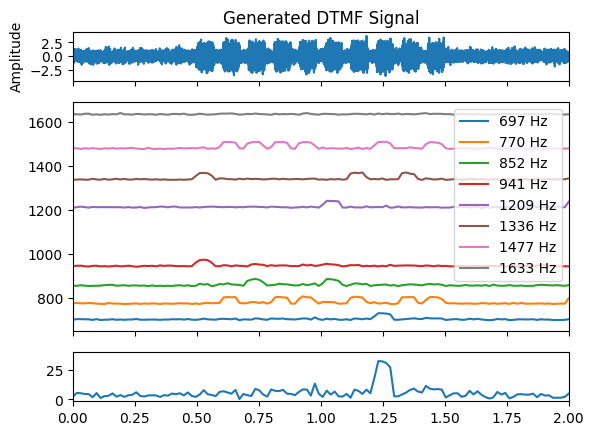

In [151]:
chunk_size = 128  # Number of samples in each chunk (modify based on your 4KB chunk size and sample format)
dtmf_frequencies = [697, 770, 852, 941, 1209, 1336, 1477, 1633]
Fs=wav_samplerate
dtmf_signal=np.array(wav_data,dtype=np.float32)
minMax=[ff(dtmf_signal) for ff in [np.min,np.mean,np.max]]
rh=minMax
dtmf_signal = 2.5*(dtmf_signal-minMax[1])/minMax[-1]
noise=np.random.randn(int(len(dtmf_signal)))*0.5
dtmf_signal+=noise
# Detect DTMF frequencies in the chunk
detected_frequencies = np.array(to_dtmf_frequencies(dtmf_signal, Fs,chunk_size=chunk_size))
#scale the output for display purposes:
detected_frequencies = detected_frequencies**0.4
#print("Detected frequencies:", detected_frequencies)
x=np.array(list(range(0,len(dtmf_signal),chunk_size)))/Fs
fig,ax=plt.subplots(3,1,sharex=True,height_ratios=[.15,0.7,.15])
ax0,ax1,ax2=(ax[0],ax[1],ax[2])
#ax1:Axes=ax[1]
#plt.figure(figsize=(10, 10))
#for ff in dtmf_frequencies:
ax0.plot(np.linspace(0,len(dtmf_signal)/Fs,len(dtmf_signal)),dtmf_signal)
ax0.set_title('Generated DTMF Signal')
#plt.xlabel('Sample')
ax0.set_ylabel('Amplitude')
ax1.plot(x,detected_frequencies + dtmf_frequencies)
ax1.legend([f"{ff} Hz" for ff in dtmf_frequencies])
ax1.set_xlim([0,2])
ax2.plot(x,detected_frequencies[:,0])


(None, None)

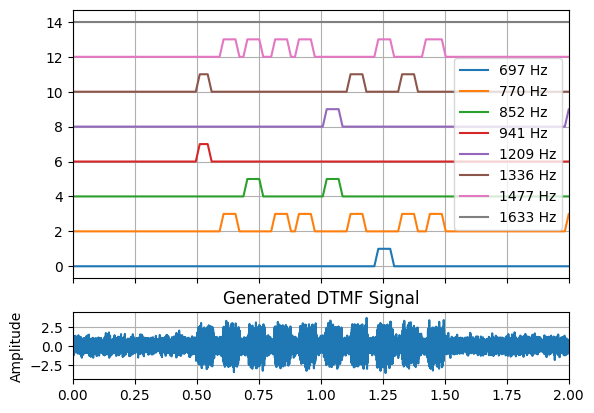

In [152]:
mystats=[ff(detected_frequencies,axis=0) for ff in (np.min,np.mean,np.median,np.mean,np.std,np.max)]
mystats=np.median(mystats,axis=1)
classified=np.array([[1 if vvv else 0 for vvv in detected_frequencies[:,ffreq]>mystats[1]+1.5*mystats[4]] for ffreq in range(detected_frequencies.shape[1])]).T
x=np.array(list(range(0,len(dtmf_signal),chunk_size)))/Fs
fig,ax=plt.subplots(2,1,sharex=True,height_ratios=[.8,0.2])
ax0,ax1=(ax[1],ax[0])
ax0.plot(np.linspace(0,len(dtmf_signal)/Fs,len(dtmf_signal)),dtmf_signal)
ax0.set_title('Generated DTMF Signal')
#plt.xlabel('Sample')
ax0.set_ylabel('Amplitude')
ax1.plot(x,classified + np.arange(0,2*detected_frequencies.shape[1],2))
ax1.legend([f"{ff} Hz" for ff in dtmf_frequencies])
ax1.set_xlim([0,2])
ax0.grid(),ax1.grid()


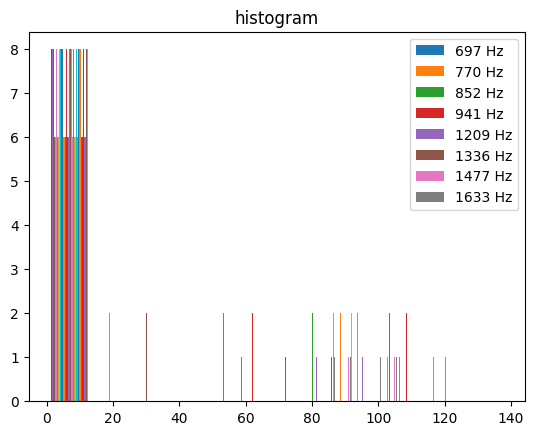

In [20]:
fig,ax=plt.subplots(1,1,sharex=True)
ax.hist(detected_frequencies,bins=10)
ax.set_title('histogram')
ax.legend([f"{ff} Hz" for ff in dtmf_frequencies])

#np.histogram(detected_frequencies[0])

array([ 3.63247946,  3.9392337 ,  3.18611196,  6.79349825,  4.28255544,
        1.57565289,  3.19323282,  2.09165451,  6.53926501,  4.2375477 ,
        1.64511166,  4.46655617,  1.09120477,  3.9312959 ,  1.64171015,
        2.1268576 ,  2.6884209 ,  4.110031  ,  4.49178988,  3.78018651,
        4.99144669,  5.77505783,  2.23550947,  2.30907342,  4.49023357,
        3.96001249,  4.12729986,  1.24551093,  2.00097994,  4.83500375,
        1.73707268,  2.75396994,  8.25632521,  4.58012095,  7.42110508,
        7.89037423,  2.70556827,  8.10781294, 32.37976338, 32.3856816 ,
       33.78293778, 29.81629916,  4.23807933,  2.57238115, 24.8131826 ,
       32.20054167, 31.07301664, 34.68178168, 14.67653461,  2.17263599,
       11.76684995, 32.31823695, 34.2165963 , 34.74843703, 29.59001514,
        3.73150847,  3.36311776, 29.60453498, 31.49600202, 31.52840948,
       32.08960161, 16.5939813 ,  1.90830952,  3.88919972,  3.51448898,
        3.0256032 ,  3.20845632,  3.28492128,  4.62219027,  3.58

In [16]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=3):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=3):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [22]:
import numpy as np
import wave



# Constants
dtmf_duration = 0.080  # DTMF tone duration in seconds
dtmf_spacing = 0.045  # Space between DTMF tones in seconds
carrier_freq = 12000  # Carrier frequency in Hz
fs = carrier_freq*6  # Sampling frequency in Hz
lead_in_time = 0.5  # Time before the first DTMF tone in seconds
lead_out_time = 0.75  # Time after the last DTMF tone in seconds
padding_time = 0.5  # Padding time before and after the carrier in seconds
noise_std_dev_ratio = 0.1  # Noise standard deviation relative to the carrier amplitude

def generate_dtmf_tone(digits, fs, duration, spacing):
    # DTMF Frequencies (Low and High)
    dtmf_freqs = {
        '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
        '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
        '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
        '*': (941, 1209), '0': (941, 1336), '#': (941, 1477),
        'A': (697, 1633), 'B': (770, 1633), 'C': (852, 1633), 
        'D': (941, 1633), 'E': (941, 1209), 'F': (941, 1477),
    }

    t_tone = np.linspace(0, duration, int(fs * duration), False)
    t_space = np.linspace(0, spacing, int(fs * spacing), False)
    silence = np.zeros_like(t_space)
    
    signal = np.array([])
    for digit in digits:
        f1, f2 = dtmf_freqs[digit]
        tone = np.sin(2 * np.pi * f1 * t_tone) + np.sin(2 * np.pi * f2 * t_tone)
        signal = np.concatenate([signal, tone, silence])
    
    return signal[:-len(silence)]  # Remove the last silence

def fm_modulate(dtmf_signal, carrier_freq, fs, lead_in_time, lead_out_time, padding_time):
    t_carrier_lead_in = np.linspace(0, lead_in_time, int(fs * lead_in_time), False)
    t_carrier_lead_out = np.linspace(0, lead_out_time, int(fs * lead_out_time), False)
    t_padding = np.linspace(0, padding_time, int(fs * padding_time), False)
    silence_padding = np.zeros_like(t_padding)
    
    carrier_lead_in = np.sin(2 * np.pi * carrier_freq * t_carrier_lead_in)
    carrier_lead_out = np.sin(2 * np.pi * carrier_freq * t_carrier_lead_out)
    
    # FM Modulate
    t_mod = np.linspace(0, len(dtmf_signal)/fs, len(dtmf_signal), False)
    carrier_modulated = np.sin(2 * np.pi * carrier_freq * t_mod + dtmf_signal)
    
    full_signal = np.concatenate([silence_padding, carrier_lead_in, carrier_modulated, carrier_lead_out, silence_padding])
    
    return full_signal

def add_awgn(signal, std_dev_ratio):
    noise = np.random.normal(0, np.max(signal) * std_dev_ratio, signal.shape)
    return signal + noise

# Generate DTMF signal
dtmf_signal = generate_dtmf_tone("12345ABC#*", fs, dtmf_duration, dtmf_spacing)

# FM Modulate
fm_signal = fm_modulate(dtmf_signal, carrier_freq, fs, lead_in_time, lead_out_time, padding_time)

# Add AWGN
full_signal_with_noise = add_awgn(fm_signal, noise_std_dev_ratio)

cutoff, order = (int(carrier_freq*0.75),3)

# Save to WAV file
for filename,func in {'dtmf_fm_modulated.wav':lambda data, cutoff, fs, order:data,'dtmf_fm_modulated_LP.wav':butter_lowpass_filter}.items():
    with wave.open(filename, 'w') as wav_file:
        num_channels = 1
        sampwidth = 2  # 2 bytes for np.int16
        framerate = fs
        comptype = "NONE"
        compname = "not compressed"
        max_int16 = np.iinfo(np.int16).max
        signalData=np.int16((func(full_signal_with_noise,cutoff,fs,order) / np.max(np.abs(full_signal_with_noise))) * max_int16)
        nframes = normalized_signal.shape[0]
        print(f"Singal Data: {signalData.shape}")
        wav_params = (num_channels, sampwidth, framerate, nframes, comptype, compname)
        wav_file.setparams(wav_params)
        wav_file.writeframes(signalData.tobytes())
    print(f"File '{filename}' successfully saved.")
        

Singal Data: (248760,)
File 'dtmf_fm_modulated.wav' successfully saved.
Singal Data: (248760,)
File 'dtmf_fm_modulated_LP.wav' successfully saved.


In [20]:
import numpy as np
import wave
import matplotlib.pyplot as plt

# Compute and Plot Spectrogram
# For simplicity, we'll compute the spectrogram manually using numpy's FFT
def simple_spectrogram(signal, fs, window_size, noverlap):
    step = window_size - noverlap
    slices = [signal[i:i+window_size] for i in range(0, len(signal) - window_size + 1, step)]
    freqs = np.fft.rfftfreq(window_size, d=1./fs)
    times = np.arange(len(slices)) * (window_size - noverlap) / fs
    spec = np.array([np.abs(np.fft.rfft(window)) for window in slices])
    return freqs, times, spec.T


# Load the WAV file
filename = 'dtmf_fm_modulated.wav'
with wave.open(filename, 'r') as wav_file:
    nchannels, sampwidth, framerate, nframes, comptype, compname = wav_file.getparams()
    frames = wav_file.readframes(nframes)
    # Convert frames to int16
    dtype = np.int16
    signal = np.frombuffer(frames, dtype=dtype)

# Normalize the signal for plotting as voltage
time = np.linspace(0, nframes / framerate, num=nframes)
voltage_signal = signal / np.max(np.abs(signal))


AttributeError: 'Axes' object has no attribute 'set_tight_layout'

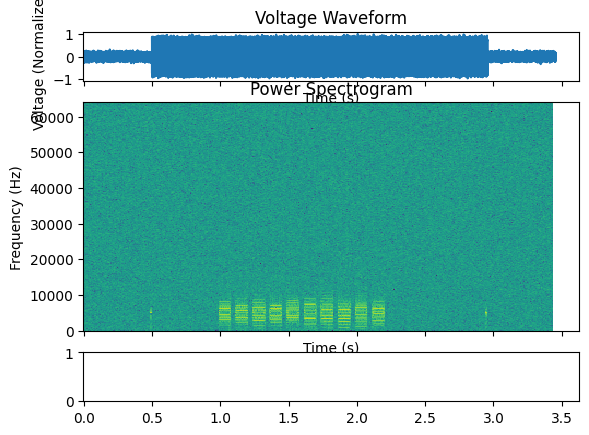

In [9]:
# Plot Voltage Waveform
fig,ax=plt.subplots(3,1,sharex=True,height_ratios=[.15,0.7,.15])
ax0,ax1,ax2=(ax[0],ax[1],ax[2])

ax0.plot(time, voltage_signal)
ax0.set_title('Voltage Waveform')
ax0.set_ylabel('Voltage (Normalized)')
ax0.set_xlabel('Time (s)')

f, t, Sxx = simple_spectrogram(signal, framerate, 2048, 1024)
#plt.subplot(2, 1, 2, sharex=plt.gca())
ax1.pcolormesh(t, f, 10 * np.log10(Sxx))
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('Time (s)')
ax1.set_title('Power Spectrogram')
#ax1.set_xlim((0.9995,1.0005))
ax1.set_tight_layout()
#plt.show()
detected_frequencies = np.array(to_dtmf_frequencies(dtmf_signal, Fs,chunk_size=chunk_size))
#scale the output for display purposes:
detected_frequencies = detected_frequencies**0.4
#print("Detected frequencies:", detected_frequencies)
x=np.array(list(range(0,len(dtmf_signal),chunk_size)))/Fs


[0.     0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009
 0.001  0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019]


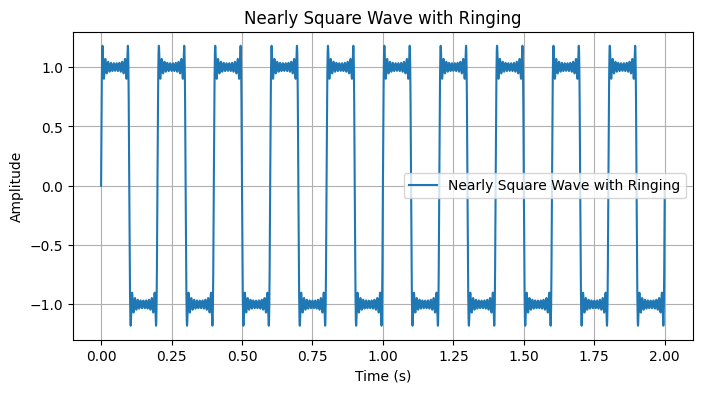

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_square_wave_with_ringing(frequency, sample_rate, duration, num_terms,expCount:int=2):
    """
    Generate a nearly square wave using a sum of sines approach.
    
    Parameters:
    - frequency: The fundamental frequency of the square wave in Hz.
    - sample_rate: The sample rate in samples per second.
    - duration: Duration of the signal in seconds.
    - num_terms: Number of terms in the sum (controls the approximation).
    
    Returns:
    - t: Time array.
    - signal: The generated signal.
    """

    NN=int(sample_rate * duration)
    XX=np.arange(NN)
    t= (duration/NN)*XX
#    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    YYexp=(XX % (expCount*frequency))#/(expCount*frequency)
    signal = np.zeros_like(t)

    print(t[:20])

    for n in range(1, 2*num_terms, 2):
        # Sum odd harmonics of the fundamental frequency
        harmonic = np.sin(2 * np.pi * (n * frequency) * t) / n
        signal += harmonic
    
    # Normalize the signal
    signal *= 4 / np.pi
    
    return t,signal,YYexp

# Example usage
frequency = 5  # Fundamental frequency in Hz
sample_rate = 10000  # Sample rate in samples per second
duration = 2  # Duration in seconds
num_terms = 10  # Number of terms in the sum

t, signal,YY = generate_square_wave_with_ringing(frequency, sample_rate, duration, num_terms)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t, signal, label='Nearly Square Wave with Ringing')
plt.title('Nearly Square Wave with Ringing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
# plt.plot(t, YY ,'r-', label='Exp')
plt.legend()

plt.show()

In [43]:
dtmf_frequencies

NameError: name 'dtmf_frequencies' is not defined

0.0002


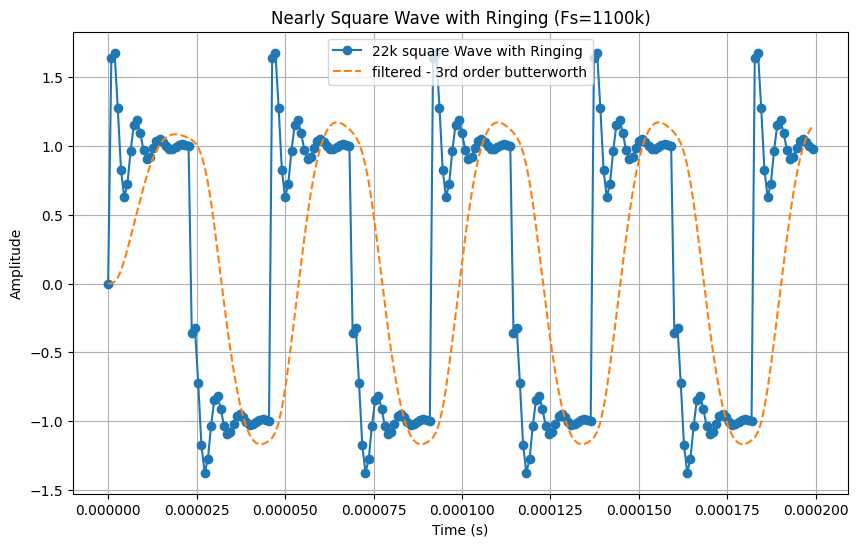

In [1]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

def butter_lowpass(cutoff, fs, order=3):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=3):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters
Fcarrier = 22000  # Fcarrier of the square wave
sample_rate = 50*Fcarrier  # Samples per second
duration = Fcarrier/sample_rate/100  # seconds
print (duration)
#assert False
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
square_wave = np.sign(np.sin(2 * np.pi * Fcarrier * t))
# Ringing parameters
ring_freq = 7*Fcarrier  # Fcarrier of the ringing
damping_coefficient_time_constant = 0.75*1/ring_freq  # Controls the rate of exponential decay

# Generate the ringing waveform. It decays over time and is zero after the first peak of the square wave.
ringing_wave = np.exp(- (t % (1/(2*Fcarrier))) / (damping_coefficient_time_constant)) * np.sin(2 * np.pi * ring_freq * (t % (1/(2*Fcarrier))))
# Apply the ringing only at the start
# ringing_wave[t > (1/Fcarrier)/2] = 0  # Apply to half period of the square wave Fcarrier
combined_wave = square_wave + ringing_wave
plt.figure(figsize=(10, 6))
title=f'Nearly Square Wave with Ringing (Fs={sample_rate//1000}k)'
plt.plot(t, combined_wave, '-o',label=f'{Fcarrier//1000}k square Wave with Ringing')
plt.plot(t, butter_lowpass_filter(combined_wave, 40000, sample_rate), '--',label=f'filtered - 3rd order butterworth')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(title)
plt.grid(True)
plt.legend()


In [31]:
np.arange(5)%3

array([0, 1, 2, 0, 1], dtype=int32)

To achieve FM modulation of DTMF (Dual-Tone Multi-Frequency) audio tones and output the results from a Raspberry Pi Pico (RP2040) GPIO pin at 3.3V, you can follow these steps:

    Generate DTMF Tones: Use a library or write a function to generate the DTMF tones. Each DTMF tone is a combination of two sine waves of specific frequencies.

    FM Modulation: Implement Frequency Modulation (FM) where the frequency of the carrier wave is varied in accordance with the DTMF signal.

    Square Wave Carrier: Generate a square wave carrier at 22kHz.

    Output via GPIO: Output the FM modulated signal through a GPIO pin.

    Add DC Voltage: Use external circuitry to add the resultant square wave to a DC voltage signal at 7V.

Here is a basic outline of how you could implement this in code for the RP2040 using MicroPython:

In [ ]:
import math
import array
import time
from machine import Pin, PWM

# Constants for DTMF frequencies
DTMF_FREQUENCIES = {
    '1': (697, 1209),
    '2': (697, 1336),
    '3': (697, 1477),
    '4': (770, 1209),
    '5': (770, 1336),
    '6': (770, 1477),
    '7': (852, 1209),
    '8': (852, 1336),
    '9': (852, 1477),
    '0': (941, 1336),
    '*': (941, 1209),
    '#': (941, 1477)
}

# Generate DTMF tone for a digit
def generate_dtmf_tone(digit, duration_ms, sample_rate=4800):
    freq1, freq2 = DTMF_FREQUENCIES[digit]
    num_samples = duration_ms * sample_rate // 1000
    wave = array.array("h", (0 for _ in range(num_samples)))

    for i in range(num_samples):
        t = i / sample_rate
        wave[i] = int(32767 * (0.5 * (math.sin(2 * math.pi * freq1 * t) + math.sin(2 * math.pi * freq2 * t))))

    return wave


def fm_modulate(dtmf_wave, carrier_freq, mod_index, sample_rate=4800):
    num_samples = len(dtmf_wave)
    carrier_wave = array.array("h", (0 for _ in range(num_samples)))

    for i in range(num_samples):
        t = i / sample_rate
        mod_signal = dtmf_wave[i] / 32768.0  # Normalize modulating signal
        inst_freq = carrier_freq + mod_index * mod_signal
        carrier_wave[i] = int(32767 * math.sin(2 * math.pi * inst_freq * t))

    return carrier_wave


if __name__=="__main__":
    # Example usage
    digit = '5'
    duration_ms = 500  # Duration of the tone in milliseconds
    dtmf_wave = generate_dtmf_tone(digit, duration_ms)

    # Example usage
    carrier_freq = 22000  # Carrier frequency in Hz
    mod_index = 5000     # Modulation index
    fm_wave = fm_modulate(dtmf_wave, carrier_freq, mod_index)


A Sigma-Delta (ΔΣ) decoder reconstructs a signal from its 1-bit Delta-Sigma modulated bitstream. The basic idea is to integrate the bitstream to recover the original signal. 

Here's how you can implement a simple Sigma-Delta decoder in Python:

### Step-by-Step Implementation

1. **Integrate the Bitstream**: The decoder accumulates the bitstream to reconstruct the original signal.
2. **Normalize the Output**: The output of the integrator needs to be normalized to match the amplitude of the original signal.


### Explanation

1. **Delta-Sigma Modulation**:
   - This part remains the same as before. It converts the sine wave into a 1-bit stream.

2. **Delta-Sigma Decoder**:
   - **Accumulator**: The `accumulator` integrates the bitstream. Each bit in the bitstream is converted from (0, 1) to (-1, 1) before integration.
   - **Normalization**: After integration, the decoded signal is normalized to match the amplitude of the original signal.

### Considerations

- **Integrator**: The integrator accumulates the bitstream to reconstruct the original signal. This is a simple form of low-pass filtering.
- **Normalization**: The normalization step ensures the decoded signal has the same amplitude range as the original signal.
- **Delay**: There might be a delay introduced by the integration process, but it should be negligible for most purposes.

This code provides a basic implementation of a Sigma-Delta modulator and decoder in Python. You can further refine and optimize it based on your specific requirements and constraints.

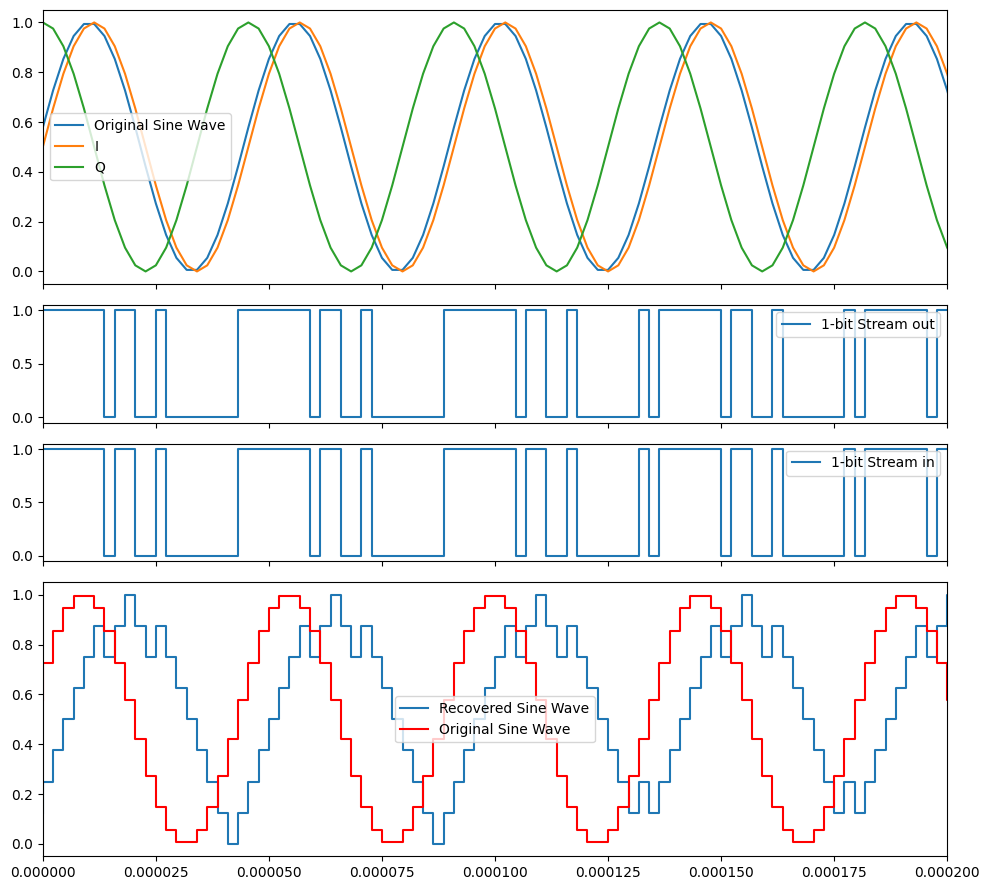

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Delta-Sigma Modulation
def delta_sigma_modulation(signal):
    n = len(signal)
    quantized_signal = np.zeros(n)
    integrator = 0
    for i in range(n):
        integrator += signal[i] - quantized_signal[i-1] if i > 0 else signal[i]
        quantized_signal[i] = 1 if integrator > 0 else 0
    return quantized_signal

# Delta-Sigma Decoder
def delta_sigma_decoder(bitstream):
    n = len(bitstream)
    decoded_signal = np.zeros(n)
    accumulator = 0
    for i in range(n):
        accumulator += bitstream[i] * 2 - 1  # Convert bitstream (0,1) to (-1,1)
        decoded_signal[i] = accumulator
    # Normalize the decoded signal
    decoded_signal -= np.min(decoded_signal)
    decoded_signal /= np.max(decoded_signal)
    return decoded_signal

# N-Bit variant doesn't seem to work yet

# N-bit Delta-Sigma Modulation
def delta_sigma_modulation_nbits(signal, N_bits):
    n = len(signal)
    quantized_signal = np.zeros(n)
    integrator = 0
    max_val = 2**N_bits - 1
    for i in range(n):
        integrator += signal[i] - quantized_signal[i-1] if i > 0 else signal[i]
        quantized_signal[i] = np.clip(np.round(integrator * max_val), 0, max_val)
        integrator -= quantized_signal[i] / max_val
    return quantized_signal

# N-bit Delta-Sigma Decoder
def delta_sigma_decoder_nbits(bitstream, N_bits):
    n = len(bitstream)
    decoded_signal = np.zeros(n)
    accumulator = 0
    max_val = 2**N_bits - 1
    for i in range(n):
        accumulator += bitstream[i] / max_val
        decoded_signal[i] = accumulator
    # Normalize the decoded signal
    decoded_signal -= np.min(decoded_signal)
    decoded_signal /= np.max(decoded_signal)
    return decoded_signal


# Parameters
carrier_freq = 22000  # Carrier frequency in Hz
oversampling_factor = 20  # Oversampling factor
sampling_freq = carrier_freq * oversampling_factor  # Sampling frequency
duration = 0.001  # Duration of the signal in seconds
phaseError=0.05 * np.pi

Nbits=1

# Time array
t = np.linspace(0, duration, int(sampling_freq * duration), endpoint=False)

# Generate the carrier sine wave
sine_wave = 0.5 * np.sin(2 * np.pi * carrier_freq * t + phaseError) + 0.5

# Generate the IQ waves
Isine_wave = 0.5 * np.sin(2 * np.pi * carrier_freq * t) + 0.5
Qsine_wave = 0.5 * np.cos(2 * np.pi * carrier_freq * t) + 0.5
Ibitstream = delta_sigma_modulation(Isine_wave) 
Qbitstream = delta_sigma_modulation(Qsine_wave) 

# Apply Delta-Sigma Modulation
bitstream = delta_sigma_modulation(sine_wave) if Nbits<2 \
            else delta_sigma_modulation_nbits(sine_wave,N_bits=Nbits)

#Idemod=

decoded_signal=delta_sigma_decoder(bitstream=bitstream)  if Nbits<2 \
            else delta_sigma_decoder_nbits(bitstream=bitstream,N_bits=Nbits)

fig,ax=plt.subplots(4,1,figsize=(10,9),sharex=True,height_ratios=[.35,0.15,0.15,0.35])
ax0,ax1,ax2,ax3=(ax[0],ax[1],ax[2],ax[3])


# Plot the original sine wave and the 1-bit stream
ax0.plot(t, sine_wave, label='Original Sine Wave')
ax0.plot(t, Isine_wave, label='I')
ax0.plot(t, Qsine_wave, label='Q')
ax0.legend()
ax0.set_xlim([0,0.0002])
ax1.plot(t, bitstream, label='1-bit Stream out', drawstyle='steps-pre')
ax1.legend()
ax2.plot(t, bitstream, label='1-bit Stream in', drawstyle='steps-pre')
ax2.legend()
ax3.plot(t, decoded_signal, label='Recovered Sine Wave', drawstyle='steps-pre')
ax3.plot(t, sine_wave, 'r-',label='Original Sine Wave', drawstyle='steps-pre')
ax3.legend()

plt.tight_layout()

